[800, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 800]
[800, 20.40201, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-0

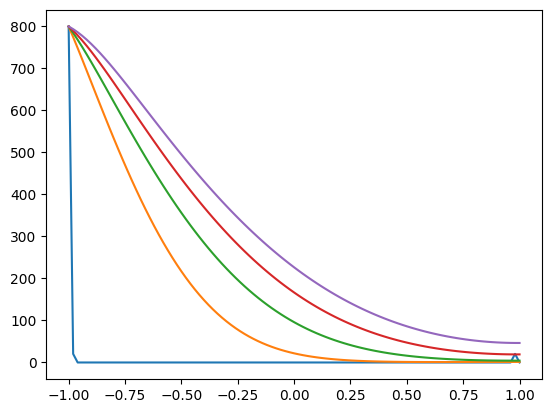

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Constants for the number of iterations and how many graphs needed per number of iterations
number_of_iterations = 50000
number_of_graphs = 5
u = number_of_iterations//number_of_graphs

#Constants
number_of_points = int(101)
delta_x = 2/101
delta_t = 1/1000
alpha = 0.01
beta = 0.01
gamma = 0.01

# Newton cooling
h =1 #heat transfer coefficient
A =1 # heat transfer surface area
u_0 = 30 #environment Tem


r = alpha*delta_t/delta_x**2
r_1 = h*A*alpha*delta_t/delta_x

k = beta*delta_t

#Boundary conditions
left_boundary_condition = 800
right_boundary_condition = 800

#Boundary state for time equals zero and setting up the initial state
boundary_state = []
for s in range(0,number_of_points):
    boundary_state.append(0)
boundary_state[0] = left_boundary_condition
boundary_state[-1] = right_boundary_condition
boundary_state = tuple(boundary_state)


state = list(boundary_state)
print(state)
plots=[]

#Function which creates a new state and replaces the old one
def function_(l):
    new_state = []
    new_state.append(left_boundary_condition)
    for i in range(1,number_of_points-1):
        if i == (number_of_points-1)/2:
            new_state.append(r*state[i-1] + r*state[i+1] + (1-2*r)*state[i] + k*math.exp(gamma*state[i]))
        if i == (number_of_points):
            new_state.append(-2*r_1*(state[i]-u_0) + (1-2*r)*state[i] + 2*r*state[i-1] + k*math.exp(gamma*state[i]))
        else:
            new_state.append(r*state[i-1] + r*state[i+1] + (1-2*r)*state[i])
    new_state.append(right_boundary_condition)
    if l%u == 0:
        plots.append(new_state)
    for d in range(0,number_of_points):
        state[d] = new_state[d]
    return state

def function(l):
    new_state = []
    new_state.append(left_boundary_condition)
    for i in range(1,number_of_points-1):
        new_state.append(r*state[i-1] + r*state[i+1] + (1-2*r)*state[i] + k*math.exp(gamma*state[i]))
    #new_state.append(-2*r_1*(state[i]-u_0) + (1-2*r)*state[i] + 2*r*state[i-1] + k*math.exp(gamma*state[i]))
    new_state.append((-2*h*A*r*delta_x + 1 - 2*r)*state[i] + (2*r)*state[i-1] + (2*h*A*r*delta_x*u_0) + (k)*math.exp(gamma*state[i]))
    if l == 0:
        print(new_state)
    if l%u == 0:
        plots.append(new_state)
    for d in range(0,number_of_points):
        state[d] = new_state[d]
    return state
        

#Running the code for 'number_of_iterations' iterations
for l in range(0,number_of_iterations):
    function(l)

#Setting up the graph
x = np.linspace(-1,1,number_of_points)
for m in range(0,number_of_graphs):
    plt.plot(x,plots[m])
plt.show()


method 1

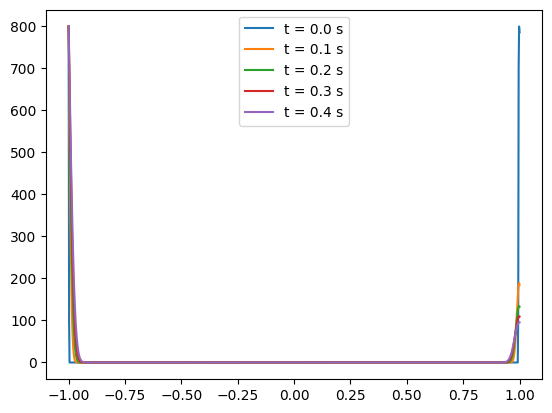

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# parameters
number_of_points = 1001
L = 2
delta_x = L / (number_of_points - 1)
delta_t = 0.001  # time step
D_T = 0.0005
ca = 10**-10
beita = 0.007


# Neumann boundary 
u_s = 100

k=5  # h/k in newton cooling 

r = D_T * delta_t / delta_x**2
assert r <= 0.5, "Time step too large! Reduce delta_t."

max_time_steps = 500
plot_times = range(0, max_time_steps, 100)

# boundary condition
T = np.zeros(number_of_points)
T[0] = T[-1] = 800  # Dirichlet boundary condition
T[-2]=T[-3]=800

# Find index for x=0 (middle point)
mid_index = number_of_points // 2

# List to store T(0,t) values
T0_values = []
time_steps = []


def update_temperature(T, T_new, r, delta_t, ca, beita, k,  u_s, delta_x):
    # 内部点更新
    T_new[1:-1] = T[1:-1] + r * (T[2:] - 2*T[1:-1] + T[:-2]) + delta_t * ca * np.exp(beita * T[1:-1])
    
    # Newton Cooling: 
    T_new[-1] = -2 * k * (T[-2] - u_s) * delta_x + T[-3]
    
    return T_new

# FDM 
T_new = np.copy(T)

for step in range(max_time_steps):
    T_new = update_temperature(T, T_new, r, delta_t, ca, beita, k, u_s, delta_x)

    time_steps.append(step * delta_t)  # Convert step count to real time

    if step in plot_times:
    
        plt.plot(np.linspace(-1, 1, number_of_points), T_new, label=f't = {step * delta_t} s')
        
    T[:] = T_new[:]  

plt.legend()
plt.show() 

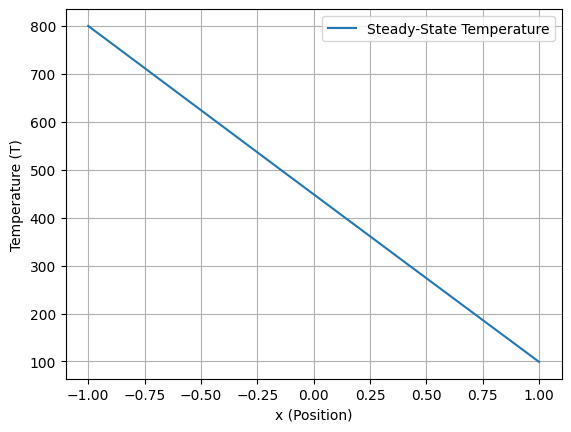

In [17]:
tolerance=1e-6



T = np.zeros(number_of_points)
T[0] = T[-1] = 800  # Dirichlet boundary condition
T[-2]=T[-3]=800



T_new_1 = np.copy(T)

while True:  

    T_new_1[1:-1] = T[1:-1] + r * (T[2:] - 2*T[1:-1] + T[:-2]) + delta_t * ca * np.exp(beita * T[1:-1])
    T_new_1[-1] = -2 * k * (T[-2] - u_s) * delta_x + T[-3]

    max_diff = np.max(np.abs(T_new_1 - T))


    if max_diff < tolerance:

        break

    T[:] = T_new_1[:]
    step += 1  

x = np.linspace(-1, 1, number_of_points)
plt.plot(x, T_new_1, label="Steady-State Temperature")
plt.xlabel("x (Position)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.grid()
plt.show()

Method 2

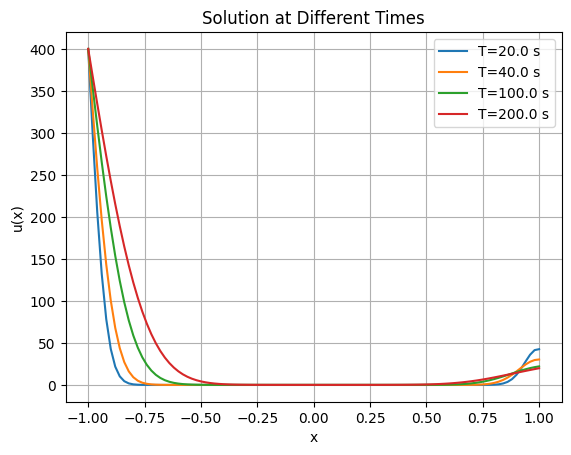

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def f(Tend):
    # parameters
    D_T = 19*10**-6
    ca = 9.34*10**-19
    beita = 0.072
    
    #newton cooling
    k = 5
    Ts = 30
    
    # integrate parameters
    b_l = -1  # left_boundary
    b_r = 1   # right boundary
    h = 0.02  # x_step
    K = 0.2   # time_step
    xx = np.arange(b_l, b_r + h, h)
    N = len(xx)  # number of points
    
    # Matrix defined
    r = D_T * K / h**2
    e = np.ones(N)
    L = diags([e, -2*e, e], offsets=[1, 0, -1], shape=(N, N))
    
    # apply Newton cooling
    L = L.tolil()
    L[-1, -1] = L[-1, -1] - 2 * k * h
    L[-1, -2] = 2
    L = L.tocsc() * (D_T * K / h**2)
    

    def f_source(u):
        return ca * np.exp(beita * u)
    

    u_0 = np.zeros(N)
    u_0[0] = 400
    u_0[-1] = 400
    
    # integrate
    N2 = int(Tend / K)
    for _ in range(N2):
        y_x = f_source(u_0)
        y_x[-1] += (D_T * 2 * k * Ts * h) / h**2
        u_0 = u_0 + L.dot(u_0) + K * y_x
        u_0[0] = 400
    
    return u_0

# time step to plot
T_m = [ 100,200,500,1000]
xx = np.arange(-1, 1 + 0.02, 0.02)


K=0.2


#plotting
plt.figure()
for T in T_m:
    jie = f(T)
    plt.plot(xx, jie, label=f'T={T*K} s')

plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution at Different Times')
plt.grid(True)
plt.show()